In [1]:
import pandas as pd
from looper import Looper
from PIL import Image
import numpy as np

from models import CNN_Encoder, RNN_Decoder, image_features_extract_model

In [2]:
looper = Looper(CNN_Encoder, RNN_Decoder, image_features_extract_model)

Training with the following params:
VOCAB_SIZE : 5000
BATCH_SIZE : 32
BUFFER_SIZE : 5000
embedding_dim : 512
embedding_words : 300
units : 512
embedding_size : 5001
MAX_LENGTH : 20
TOKENIZER_FOLDER : ./tokenizer/
TOKENIZER_NAME : spbe_tokenizer.e
CHECKPOINT_FOLDER : saved_models
## Run set_params to change params ##


In [3]:
tokenizer = looper.load_tokenizer()

loading from ./tokenizer/spbe_tokenizer.e


In [4]:
looper.params

{'VOCAB_SIZE': 5000,
 'BATCH_SIZE': 32,
 'BUFFER_SIZE': 5000,
 'embedding_dim': 512,
 'embedding_words': 300,
 'units': 512,
 'embedding_size': 5001,
 'MAX_LENGTH': 20,
 'TOKENIZER_FOLDER': './tokenizer/',
 'TOKENIZER_NAME': 'spbe_tokenizer.e',
 'CHECKPOINT_FOLDER': 'saved_models'}

In [5]:
# CHANGE PARAMS

params = {'VOCAB_SIZE': 5000,
 'BATCH_SIZE': 32,
 'BUFFER_SIZE': 5000,
 'embedding_dim': 1024,
 'embedding_words': 300,
 'units': 1024,
 'embedding_size': 5001,
 'MAX_LENGTH': 20,
 'TOKENIZER_FOLDER': './tokenizer/',
 'TOKENIZER_NAME': 'spbe_tokenizer.e',
 'CHECKPOINT_FOLDER': './checkpoint_dis/1024_embed'}

params = looper.set_params(params)

Training with the following params:
VOCAB_SIZE : 5000
BATCH_SIZE : 32
BUFFER_SIZE : 5000
embedding_dim : 1024
embedding_words : 300
units : 1024
embedding_size : 5001
MAX_LENGTH : 20
TOKENIZER_FOLDER : ./tokenizer/
TOKENIZER_NAME : spbe_tokenizer.e
CHECKPOINT_FOLDER : ./checkpoint_dis/1024_embed
## Run set_params to change params ##


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff505789e8>]],
      dtype=object)

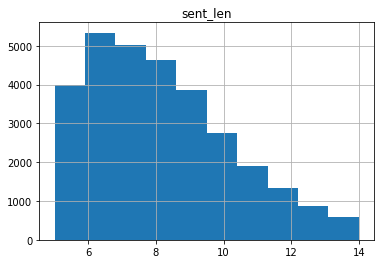

In [6]:
data = pd.read_csv('val.csv')
captions_val = data.title.to_list()
images_val = data.paths.to_list()

data = pd.read_csv('train.csv')
data['captions'] =  data['captions'].astype(str)
data['sent_len'] = data['captions'].apply(lambda r: len(r.split(' ')))
data = data[(data['sent_len']<20) & (data['sent_len']>4)]
captions_train = data.title.to_list()
images_train = data.paths.to_list()
data.hist('sent_len')

In [7]:
dataset_val = looper.make_dataset(images_val,captions_val)

max title len 20
len titles: 2375,len images: 2375
captions vector shape (2375, 20)
NOT using augmentations in loader


In [8]:
dataset_train = looper.make_dataset(images_train, captions_train, loader_type='aug')

max title len 20
len titles: 29254,len images: 29254
captions vector shape (29254, 20)
Using augmentations in loader


In [10]:
looper.train(dataset_train, dataset_val, 40, save_n=3)

Epoch 1 Batch 0 Loss 1.7335
Epoch 1 Batch 100 Loss 1.7104
Epoch 1 Batch 200 Loss 1.6988
Epoch 1 Batch 300 Loss 1.4412
Epoch 1 Batch 400 Loss 1.4744
Epoch 1 Batch 500 Loss 1.5901
Epoch 1 Batch 600 Loss 1.5313
Epoch 1 Batch 700 Loss 1.4111
Epoch 1 Batch 800 Loss 1.4420
Epoch 1 Batch 900 Loss 1.3941
precision at | val: 0.2010714340209961, train: 0.20968806365800033
Epoch 1 Loss 2.414678
Time taken for 1 epoch 387.61447834968567 sec

Epoch 2 Batch 0 Loss 1.3773
Epoch 2 Batch 100 Loss 1.3290
Epoch 2 Batch 200 Loss 1.3677
Epoch 2 Batch 300 Loss 1.2660
Epoch 2 Batch 400 Loss 1.3922
Epoch 2 Batch 500 Loss 1.3392
Epoch 2 Batch 600 Loss 1.3708
Epoch 2 Batch 700 Loss 1.3133
Epoch 2 Batch 800 Loss 1.1813
Epoch 2 Batch 900 Loss 1.4067
Epoch 2 Loss 2.190543
Time taken for 1 epoch 251.69899249076843 sec

Epoch 3 Batch 0 Loss 1.3788
Epoch 3 Batch 100 Loss 1.1327
Epoch 3 Batch 200 Loss 1.2980
Epoch 3 Batch 300 Loss 1.3055
Epoch 3 Batch 400 Loss 1.3005
Epoch 3 Batch 500 Loss 1.3912
Epoch 3 Batch 600 Los

In [11]:
looper.train(dataset_train, dataset_val, 40, save_n=3)

Epoch 1 Batch 0 Loss 0.1788
Epoch 1 Batch 100 Loss 0.1774
Epoch 1 Batch 200 Loss 0.1125
Epoch 1 Batch 300 Loss 0.1337
Epoch 1 Batch 400 Loss 0.1531
Epoch 1 Batch 500 Loss 0.1407
Epoch 1 Batch 600 Loss 0.1216
Epoch 1 Batch 700 Loss 0.2066
Epoch 1 Batch 800 Loss 0.1057
Epoch 1 Batch 900 Loss 0.1820
precision at | val: 0.12833333333333333, train: 1.6742486338797815
Epoch 1 Loss 0.241029
Time taken for 1 epoch 368.7309670448303 sec

Epoch 2 Batch 0 Loss 0.1843
Epoch 2 Batch 100 Loss 0.1414
Epoch 2 Batch 200 Loss 0.1635
Epoch 2 Batch 300 Loss 0.1373
Epoch 2 Batch 400 Loss 0.1497
Epoch 2 Batch 500 Loss 0.1318
Epoch 2 Batch 600 Loss 0.1662
Epoch 2 Batch 700 Loss 0.1286
Epoch 2 Batch 800 Loss 0.1474
Epoch 2 Batch 900 Loss 0.1637
Epoch 2 Loss 0.234149
Time taken for 1 epoch 250.77812337875366 sec

Epoch 3 Batch 0 Loss 0.2334
Epoch 3 Batch 100 Loss 0.1049
Epoch 3 Batch 200 Loss 0.1185
Epoch 3 Batch 300 Loss 0.1631
Epoch 3 Batch 400 Loss 0.1774
Epoch 3 Batch 500 Loss 0.1638
Epoch 3 Batch 600 Loss